In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random;
import tqdm;

In [ ]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(blank_image);

In [ ]:
def create_training_Data():
  l = 10000;
  X_train = np.zeros(shape=[l,IMAGE_SIZE, IMAGE_SIZE,1]);
  Y_train = np.zeros(shape = [l,3]);
  for i in range(l):
    rad = random.randint(5,50);
    c_x = random.randint(rad,IMAGE_SIZE-rad);
    c_y = random.randint(rad,IMAGE_SIZE-rad);
    Y_train[i,0]= c_x/IMAGE_SIZE;
    Y_train[i,1] = c_y/IMAGE_SIZE;
    Y_train[i,2] = rad/IMAGE_SIZE;
    blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8);
    X_train[i,:,:,0] = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
  return {'X_Train' : X_train, 'Y_Train': Y_train};
  

In [ ]:
training_Data = create_training_Data();

In [ ]:
plt.imshow(training_Data['X_Train'][1999].reshape(200,200))
IMAGE_SIZE*training_Data['Y_Train'][1999]

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model

regression layer 구현

In [ ]:
img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x = layers.Conv2D(5, 3, activation='relu', strides = 1, padding = 'same')(img_input)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(20, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(3, 5, activation='relu', strides = 1)(x)

# TODO
#flatten + dense layer
x = layers.Flatten()(x)
output = layers 

model = Model(img_input, output)

model.summary()

In [ ]:
model.compile(loss='mean_squared_error',optimizer= 'adam', metrics=['mse']);

In [ ]:
model.fit(training_Data["X_Train"],training_Data["Y_Train"], epochs = 3,verbose=1)

In [ ]:
IMAGE_SIZE*model.predict(training_Data['X_Train'][3].reshape(1,IMAGE_SIZE, IMAGE_SIZE,1))

In [ ]:
IMAGE_SIZE*training_Data['Y_Train'][3]

In [ ]:
plt.imshow(training_Data['X_Train'][3].reshape(200,200))

[93, 64, 50]
[[83.94175  69.52115  51.941647]]


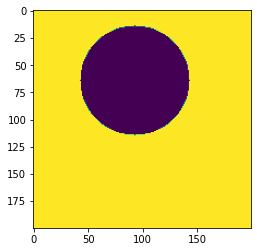

In [ ]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
print([c_x, c_y, rad])
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
new_Image = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(new_Image);
print(IMAGE_SIZE*model.predict(new_Image.reshape(1,IMAGE_SIZE, IMAGE_SIZE,1)))